In [278]:
# Import package dependencies
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
sns.set()  
import os
%matplotlib inline

In [279]:
df_returns = pd.read_csv('stock_prices.csv')

In [280]:
df_returns.tail()

,ticker,date,price
320656,HPQ,2017-11-06,21.44
320657,HPQ,2017-11-07,21.38
320658,HPQ,2017-11-08,21.42
320659,HPQ,2017-11-09,21.34
320660,HPQ,2017-11-10,21.23


In [281]:
# total number of firms in the dataset
df_returns['ticker'].nunique()

99

In [282]:
df_returns['date'][0]

'2005-01-03'

In [283]:
type(df_returns['date'][0])

str

In [284]:
# Convert the date to a timestamp object
df_returns['date'] = pd.to_datetime(df_returns['date'], format='%Y-%m-%d')

In [285]:
df_returns['date'][0]


Timestamp('2005-01-03 00:00:00')

In [286]:
type(df_returns['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [287]:
df_returns['date'].describe()

count                  320661
unique                   3239
top       2009-05-29 00:00:00
freq                       99
first     2005-01-03 00:00:00
last      2017-11-10 00:00:00
Name: date, dtype: object

In [288]:
#pct change calculates the return of a stock. 
#Groupby ticker calculates the pct_change (or daily returns) for each unique ticker, one at a time.
df_returns['returns'] = df_returns.groupby('ticker')['price'].pct_change(1)

In [289]:
#sniff test for observing outliers
df_returns.groupby('ticker')['returns'].describe()

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
A,3238.0,0.000636,0.019859,-0.110166,-0.008437,0.000763,0.010311,0.148435
ADBE,3238.0,0.000763,0.020776,-0.190346,-0.008654,0.000676,0.010372,0.143581
AES,3238.0,0.000228,0.023373,-0.157206,-0.010418,0.000477,0.010958,0.282877
AKAM,3201.0,0.000918,0.029074,-0.253120,-0.011140,0.000463,0.013407,0.240354
ALK,3201.0,0.001077,0.028163,-0.185932,-0.012498,0.000849,0.014608,0.312808
...,...,...,...,...,...,...,...,...
VIAB,1494.0,-0.000082,0.018713,-0.214829,-0.008356,0.000521,0.009426,0.138521
VZ,3238.0,0.000215,0.013150,-0.080788,-0.006447,0.000290,0.006883,0.146435
WCG,3201.0,0.001231,0.033712,-0.629504,-0.011004,0.001294,0.014254,0.240164


In [290]:
#view the highest / maximum value for a return observation.

df_returns.groupby('ticker')['returns'].max().max()

99.3053865224251

In [291]:
#At ~ 99.305 this would imply a return of ~= 9,9305% in a single day. 
#But we're dealing with daily returns which are usually very close to 0 (mean)
#this proves that we have atleast 1 outlier

In [292]:
#importing mda diles
MDA_FILES = os.listdir('mda/')

In [293]:
len(MDA_FILES)

1364

In [294]:
# File Naming Convention:
# CIKidentifier_docTheme_filingDate.txt
df = pd.DataFrame(MDA_FILES)
df.columns = ['file_name']
df.head()

,file_name
0,1001082_MDA_2005-03-16.txt
1,1001082_MDA_2006-03-15.txt
2,1001082_MDA_2007-03-01.txt
3,1001082_MDA_2008-02-26.txt
4,1001082_MDA_2009-03-02.txt


In [295]:
# Get the CIK for each firm
df['cik'] = df['file_name'].apply(lambda x : x.split('_')[0])

# Get the filing date for each firm
df['filing_date'] = df['file_name'].apply(lambda x : x.split('_')[2].split('.')[0])

In [296]:
df.head()

,file_name,cik,filing_date
0,1001082_MDA_2005-03-16.txt,1001082,2005-03-16
1,1001082_MDA_2006-03-15.txt,1001082,2006-03-15
2,1001082_MDA_2007-03-01.txt,1001082,2007-03-01
3,1001082_MDA_2008-02-26.txt,1001082,2008-02-26
4,1001082_MDA_2009-03-02.txt,1001082,2009-03-02


In [297]:
# Convert the date strings to pandas timestamps
df['filing_date'] = pd.to_datetime(df['filing_date'], format='%Y-%m-%d')

In [298]:
df['filing_date'][0]

Timestamp('2005-03-16 00:00:00')

In [299]:
df.describe()

,file_name,cik,filing_date
count,1364,1364,1364
unique,1364,99,597
top,916365_MDA_2012-02-29.txt,47217,2010-02-26 00:00:00
freq,1,16,20
first,NaN,NaN,2005-01-14 00:00:00
last,NaN,NaN,2019-12-20 00:00:00


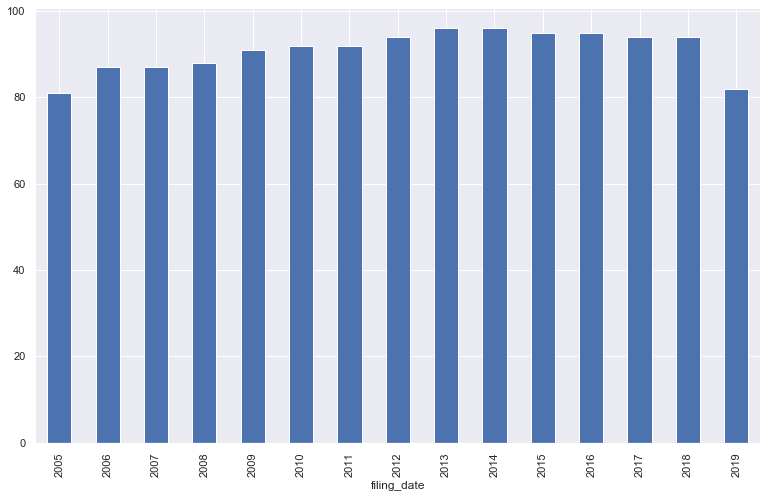

In [300]:
# Explore the number of filings by year
df.groupby(df['filing_date'].dt.year)['cik'].count().plot(kind='bar', figsize=(13, 8))

In [301]:
# Explore the number of filings per firm per year
df.groupby(['cik', df['filing_date'].dt.year])['file_name'].count().unstack()

filing_date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
cik,,,,,,,,,,,,,,,
1001082,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1002047,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1035443,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1037540,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1047862,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92122,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
922224,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
936468,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


!pip install -U spacy

Cleaning data in a single file


In [302]:
with open(f"mda/{MDA_FILES[276]}") as file:
    mda_text = file.read()
mda_text

'CIK: 1279363\nCompany Name: WELLCARE HEALTH PLANS INC \nSection: MD&A\nFiling Date: 2019-02-12\n\n\nItem 7. Management\'s Discussion and Analysis of Financial Condition and Results of Operations. The following discussion and analysis of our financial condition and results of operations should be read in conjunction with Item 6 Selected Financial Data and our consolidated financial statements and related notes appearing elsewhere in this 2018 Form 10-K. The following discussion contains forward-looking statements that involve risks, uncertainties and assumptions that could cause our actual results to differ materially from management\'s expectations. Factors that could cause such differences include those set forth under Part I, Item 1 Business and Part I, Item 1A Risk Factors , as well as Forward-Looking Statements discussed earlier in this 2018 Form 10-K. OVERVIEW Introduction WellCare Health Plans, Inc. (the "Company," "we," "us," "our") focuses primarily on providing government-spo

In [303]:
# Extract "words" from within the text file

words = mda_text.split()

In [304]:
words

['CIK:',
 '1279363',
 'Company',
 'Name:',
 'WELLCARE',
 'HEALTH',
 'PLANS',
 'INC',
 'Section:',
 'MD&A',
 'Filing',
 'Date:',
 '2019-02-12',
 'Item',
 '7.',
 "Management's",
 'Discussion',
 'and',
 'Analysis',
 'of',
 'Financial',
 'Condition',
 'and',
 'Results',
 'of',
 'Operations.',
 'The',
 'following',
 'discussion',
 'and',
 'analysis',
 'of',
 'our',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'operations',
 'should',
 'be',
 'read',
 'in',
 'conjunction',
 'with',
 'Item',
 '6',
 'Selected',
 'Financial',
 'Data',
 'and',
 'our',
 'consolidated',
 'financial',
 'statements',
 'and',
 'related',
 'notes',
 'appearing',
 'elsewhere',
 'in',
 'this',
 '2018',
 'Form',
 '10-K.',
 'The',
 'following',
 'discussion',
 'contains',
 'forward-looking',
 'statements',
 'that',
 'involve',
 'risks,',
 'uncertainties',
 'and',
 'assumptions',
 'that',
 'could',
 'cause',
 'our',
 'actual',
 'results',
 'to',
 'differ',
 'materially',
 'from',
 "management's",
 'expectations.

In [305]:
# Get the subset of "words" which are alphabetic (ignore numericals, symbols, etc)
alphabetic_only = [word for word in words if word.isalpha()]
alphabetic_only

['Company',
 'WELLCARE',
 'HEALTH',
 'PLANS',
 'INC',
 'Filing',
 'Item',
 'Discussion',
 'and',
 'Analysis',
 'of',
 'Financial',
 'Condition',
 'and',
 'Results',
 'of',
 'The',
 'following',
 'discussion',
 'and',
 'analysis',
 'of',
 'our',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'operations',
 'should',
 'be',
 'read',
 'in',
 'conjunction',
 'with',
 'Item',
 'Selected',
 'Financial',
 'Data',
 'and',
 'our',
 'consolidated',
 'financial',
 'statements',
 'and',
 'related',
 'notes',
 'appearing',
 'elsewhere',
 'in',
 'this',
 'Form',
 'The',
 'following',
 'discussion',
 'contains',
 'statements',
 'that',
 'involve',
 'uncertainties',
 'and',
 'assumptions',
 'that',
 'could',
 'cause',
 'our',
 'actual',
 'results',
 'to',
 'differ',
 'materially',
 'from',
 'Factors',
 'that',
 'could',
 'cause',
 'such',
 'differences',
 'include',
 'those',
 'set',
 'forth',
 'under',
 'Part',
 'Item',
 'Business',
 'and',
 'Part',
 'Item',
 'Risk',
 'Factors',
 'as',
 'wel

In [306]:
# Harmonise text: convert all words to lower case
lower_case_only = [word.lower() for word in alphabetic_only]
lower_case_only

['company',
 'wellcare',
 'health',
 'plans',
 'inc',
 'filing',
 'item',
 'discussion',
 'and',
 'analysis',
 'of',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'the',
 'following',
 'discussion',
 'and',
 'analysis',
 'of',
 'our',
 'financial',
 'condition',
 'and',
 'results',
 'of',
 'operations',
 'should',
 'be',
 'read',
 'in',
 'conjunction',
 'with',
 'item',
 'selected',
 'financial',
 'data',
 'and',
 'our',
 'consolidated',
 'financial',
 'statements',
 'and',
 'related',
 'notes',
 'appearing',
 'elsewhere',
 'in',
 'this',
 'form',
 'the',
 'following',
 'discussion',
 'contains',
 'statements',
 'that',
 'involve',
 'uncertainties',
 'and',
 'assumptions',
 'that',
 'could',
 'cause',
 'our',
 'actual',
 'results',
 'to',
 'differ',
 'materially',
 'from',
 'factors',
 'that',
 'could',
 'cause',
 'such',
 'differences',
 'include',
 'those',
 'set',
 'forth',
 'under',
 'part',
 'item',
 'business',
 'and',
 'part',
 'item',
 'risk',
 'factors',
 'as',
 'wel

In [307]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [308]:
stop_words=nlp.Defaults.stop_words
print(stop_words)

{'yet', '’m', 'whose', 'much', 'take', 'or', 'became', 'from', 'her', 'that', 'does', 'within', 'thereafter', 'therein', 'else', 'its', 'ours', 'ourselves', 'same', '’ll', 'hundred', 'ten', 'latterly', 'were', 'did', 'every', "'s", 'we', 'do', 'the', 'around', 'into', "n't", 'alone', '’s', 'whenever', 'each', 'becomes', 'in', 'whither', 'well', 'others', 'thus', 'been', 'almost', 'what', 'of', 'and', 'otherwise', 'yourselves', 'their', 'onto', 'wherein', 'when', 'until', 'mostly', 'anyone', 'themselves', 'nothing', 'rather', 'put', 'which', 'still', 'twenty', 'his', 'my', 'are', 'under', 'at', 'beyond', 'you', 'six', 'own', 'also', 'may', 'fifty', 'everywhere', "'ve", 'being', 'bottom', 'than', 'anywhere', 'whole', 'see', 'now', 'with', 'therefore', 'back', 'herein', 'whoever', 'few', 'upon', 'be', 'myself', 'all', 'behind', 'then', 'make', 'something', 'give', 'amount', 'him', 'whence', 'already', 'somewhere', 'further', 'other', 'keep', 'he', 'once', 'say', 'since', 'top', 'five', 'v

In [309]:
cleaned_words = [word for word in lower_case_only if word not in stop_words]

In [310]:
cleaned_words

['company',
 'wellcare',
 'health',
 'plans',
 'inc',
 'filing',
 'item',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'following',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'operations',
 'read',
 'conjunction',
 'item',
 'selected',
 'financial',
 'data',
 'consolidated',
 'financial',
 'statements',
 'related',
 'notes',
 'appearing',
 'form',
 'following',
 'discussion',
 'contains',
 'statements',
 'involve',
 'uncertainties',
 'assumptions',
 'cause',
 'actual',
 'results',
 'differ',
 'materially',
 'factors',
 'cause',
 'differences',
 'include',
 'set',
 'forth',
 'item',
 'business',
 'item',
 'risk',
 'factors',
 'statements',
 'discussed',
 'earlier',
 'form',
 'overview',
 'introduction',
 'wellcare',
 'health',
 'focuses',
 'primarily',
 'providing',
 'managed',
 'care',
 'services',
 'seniors',
 'individuals',
 'complex',
 'medical',
 'primarily',
 'medicare',
 'advantage',
 'medicare',
 'prescription',
 'drug',
 'plans'

In [311]:
print(str(len(words)) +"\n"+ str(len(cleaned_words)))

18001
8120


# Doing sentiment analysis for a single firm

In [312]:
def clean_my_text(mda_file):
    """Returns cleaned text data."""
    stop_words=nlp.Defaults.stop_words

    with open(mda_file) as file:
        mda_text = file.read()
    
    words = mda_text.split()
    cleaned_words = [word.lower() for word in words if word.isalpha()]
    cleaned_words = [word for word in cleaned_words if word not in stop_words]
    
    return cleaned_words

In [313]:
cleaned_words = clean_my_text(f"mda/{MDA_FILES[67]}")

In [314]:
cleaned_words

['company',
 'consolidated',
 'edison',
 'inc',
 'filing',
 'item',
 'management',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'operations',
 'combined',
 'management',
 'discussion',
 'analysis',
 'financial',
 'condition',
 'results',
 'operations',
 'relates',
 'consolidated',
 'financial',
 'statements',
 'included',
 'report',
 'separate',
 'con',
 'edison',
 'cecony',
 'read',
 'conjunction',
 'financial',
 'statements',
 'notes',
 'term',
 'companies',
 'refers',
 'con',
 'edison',
 'cecony',
 'subsidiary',
 'con',
 'edison',
 'information',
 'management',
 'discussion',
 'analysis',
 'cecony',
 'applies',
 'con',
 'information',
 'item',
 'report',
 'referred',
 'discussion',
 'analysis',
 'incorporated',
 'reference',
 'use',
 'terms',
 'refer',
 'shall',
 'deemed',
 'incorporate',
 'reference',
 'discussion',
 'analysis',
 'information',
 'reference',
 'corporate',
 'overview',
 'con',
 'edison',
 'principal',
 'business',
 'operations',
 'con',
 'edi

In [315]:
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
positive_lexicon = set(opinion_lexicon.positive())
negative_lexicon = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to C:\Users\SUHAS
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [316]:
# Initialise positive and negative sentiment counters
positive_sentiment = 0
negative_sentiment = 0

# Estimate sentiment using the frequency counts approach
for word in cleaned_words:
    if word in positive_lexicon:
        positive_sentiment += 1  # this is equivalent to positive_sentiment = positive_sentiment + 1
    elif word in negative_lexicon:
        negative_sentiment += 1

In [317]:
positive_sentiment

126

In [318]:
negative_sentiment

94

In [319]:
# Estimating NPT using frequency count based estimates for positive and negative sentiment
phi_npt = (positive_sentiment - negative_sentiment) / (positive_sentiment + negative_sentiment)
phi_npt

0.14545454545454545

In [320]:
# Estimate sentiment for full sample (note: we get an error because of poor data in some instances)
sentiment_scores = {}
error_files = {}
for file in MDA_FILES:
    # Estimate sentiment
    cleaned_words = clean_my_text(f"mda/{file}")

    positive_sentiment = 0
    negative_sentiment = 0
    for word in cleaned_words:
        if word in positive_lexicon:
            positive_sentiment += 1
        elif word in negative_lexicon:
            negative_sentiment += 1

    phi_pos = positive_sentiment / len(cleaned_words)
    phi_neg = negative_sentiment / len(cleaned_words)

    try:
        phi_npt = (phi_pos - phi_neg) / (phi_pos + phi_neg)
    except ZeroDivisionError:
        error_files[file] = len(cleaned_words)
    
    sentiment_scores[file] = [phi_pos, phi_neg, phi_npt]

In [321]:
len(error_files)

193

In [322]:
error_files

{'1002047_MDA_2015-06-12.txt': 12,
 '1002047_MDA_2016-06-22.txt': 12,
 '1002047_MDA_2017-06-20.txt': 12,
 '1002047_MDA_2018-06-19.txt': 12,
 '1002047_MDA_2019-06-18.txt': 12,
 '1037540_MDA_2014-02-28.txt': 19,
 '1037540_MDA_2015-03-02.txt': 19,
 '1047862_MDA_2005-02-25.txt': 19,
 '1047862_MDA_2006-02-22.txt': 19,
 '1047862_MDA_2007-02-21.txt': 19,
 '1047862_MDA_2008-02-22.txt': 19,
 '1047862_MDA_2009-02-23.txt': 19,
 '1047862_MDA_2013-02-21.txt': 13,
 '1090872_MDA_2006-12-22.txt': 12,
 '1090872_MDA_2007-12-21.txt': 12,
 '1090872_MDA_2008-12-19.txt': 12,
 '1111711_MDA_2011-02-28.txt': 27,
 '1170010_MDA_2005-05-13.txt': 26,
 '1170010_MDA_2006-05-12.txt': 25,
 '1308161_MDA_2014-08-14.txt': 14,
 '1308161_MDA_2015-08-13.txt': 14,
 '1308161_MDA_2016-08-11.txt': 14,
 '1308161_MDA_2017-08-14.txt': 14,
 '1308161_MDA_2018-08-13.txt': 14,
 '1551182_MDA_2013-02-28.txt': 22,
 '1551182_MDA_2014-02-26.txt': 22,
 '1551182_MDA_2015-02-26.txt': 22,
 '1551182_MDA_2016-02-24.txt': 22,
 '1551182_MDA_2017-0

In [323]:
# Estimate sentiment for full sample

# Initialise dictionary to record sentiment scores / values
sentiment_scores = {}

for file in MDA_FILES:
    # Estimate sentiment
    
    # Clean text and initialise sentiment counters
    cleaned_words = clean_my_text(f"mda/{file}")
    positive_sentiment = 0
    negative_sentiment = 0
    
    # Only consider files with more than 100 cleaned words
    if len(cleaned_words) >= 100:
        for word in cleaned_words:
            if word in positive_lexicon:
                positive_sentiment += 1
            elif word in negative_lexicon:
                negative_sentiment += 1
        
        # Estimate sentiment using proportional counts approach
        phi_pos = positive_sentiment / len(cleaned_words)
        phi_neg = negative_sentiment / len(cleaned_words)

        phi_npt = (phi_pos - phi_neg) / (phi_pos + phi_neg)
    
        # Log / record scores in dictionary
        sentiment_scores[file] = [phi_pos, phi_neg, phi_npt, len(cleaned_words)]
    
    else: 
        pass


In [324]:
df_scores = pd.DataFrame(sentiment_scores).T
df_scores.head()

,0,1,2,3
1001082_MDA_2005-03-16.txt,0.044474,0.044474,0.000000,742.0
1001082_MDA_2006-03-15.txt,0.057971,0.048654,0.087379,966.0
1001082_MDA_2007-03-01.txt,0.036667,0.010000,0.571429,300.0
1001082_MDA_2008-02-26.txt,0.060056,0.058659,0.011765,716.0
1001082_MDA_2009-03-02.txt,0.055961,0.046229,0.095238,411.0


In [325]:
# Reset index to get a column for file names
df_scores.reset_index(inplace=True)
# Rename columns more appropriately
df_scores.columns = ['file_name', 'phi_pos', 'phi_neg', 'phi_npt', 'num_cleaned_words']
df_scores.head()

,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words
0,1001082_MDA_2005-03-16.txt,0.044474,0.044474,0.000000,742.0
1,1001082_MDA_2006-03-15.txt,0.057971,0.048654,0.087379,966.0
2,1001082_MDA_2007-03-01.txt,0.036667,0.010000,0.571429,300.0
3,1001082_MDA_2008-02-26.txt,0.060056,0.058659,0.011765,716.0
4,1001082_MDA_2009-03-02.txt,0.055961,0.046229,0.095238,411.0


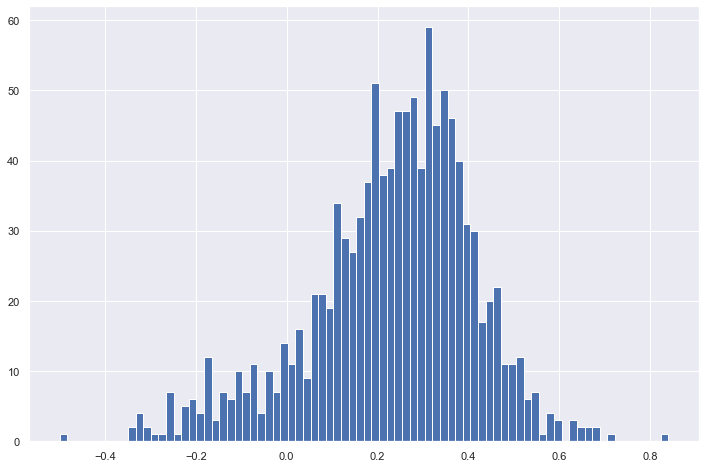

In [326]:
# Explore values of net positive tone across all documents
df_scores['phi_npt'].hist(figsize=(12, 8), bins=80)

In [327]:
df_scores['cik'] = df_scores['file_name'].apply(lambda x : x.split('_')[0])


df_scores['filing_date'] = df_scores['file_name'].apply(lambda x : x.split('_')[2].split('.')[0])
df_scores['filing_date'] = pd.to_datetime(df_scores['filing_date'], format='%Y-%m-%d')

In [331]:
df_scores.head()

,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words,cik,filing_date
0,1001082_MDA_2005-03-16.txt,0.044474,0.044474,0.000000,742.0,1001082,2005-03-16
1,1001082_MDA_2006-03-15.txt,0.057971,0.048654,0.087379,966.0,1001082,2006-03-15
2,1001082_MDA_2007-03-01.txt,0.036667,0.010000,0.571429,300.0,1001082,2007-03-01
3,1001082_MDA_2008-02-26.txt,0.060056,0.058659,0.011765,716.0,1001082,2008-02-26
4,1001082_MDA_2009-03-02.txt,0.055961,0.046229,0.095238,411.0,1001082,2009-03-02


## Merging df_scores and df1

In [329]:
df_returns.dropna(subset=['returns'], inplace=True)
df_returns.head()

,ticker,date,price,returns
1,CNP,2005-01-04,8.3168,-0.009905
2,CNP,2005-01-05,8.1662,-0.018108
3,CNP,2005-01-06,8.1730,0.000833
4,CNP,2005-01-07,8.1277,-0.005543
5,CNP,2005-01-10,8.1277,0.000000


In [332]:
df_scores['cik']=df_scores['cik'].astype(int)


In [333]:
df_crosswalk = pd.read_csv("sp500_constituents.csv")

In [334]:
df_crosswalk = df_crosswalk[['Symbol', 'CIK']]
# Rename columns to match our existing naming conventions
# This ensures we won't have duplicate columns later on
df_crosswalk.columns = ['ticker', 'cik']

In [335]:
df_crosswalk.head()

,ticker,cik
0,MMM,66740
1,ABT,1800
2,ABBV,1551152
3,ABMD,815094
4,ACN,1467373


In [336]:
df_returns = df_returns.merge(df_crosswalk, on='ticker', how='inner')
df_returns.head()

,ticker,date,price,returns,cik
0,CNP,2005-01-04,8.3168,-0.009905,1130310
1,CNP,2005-01-05,8.1662,-0.018108,1130310
2,CNP,2005-01-06,8.1730,0.000833,1130310
3,CNP,2005-01-07,8.1277,-0.005543,1130310
4,CNP,2005-01-10,8.1277,0.000000,1130310


In [337]:
# Merge the returns and tone datasets using cik and respective dates as common identifiers
# Use a "left" merge to ensure the daily returns data remains intact
df_master = df_returns.merge(df_scores, left_on=['cik', 'date'],
                            right_on=['cik', 'filing_date'],
                            how='left')
df_master.head()

,ticker,date,price,returns,cik,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words,filing_date
0,CNP,2005-01-04,8.3168,-0.009905,1130310,NaN,NaN,NaN,NaN,NaN,NaT
1,CNP,2005-01-05,8.1662,-0.018108,1130310,NaN,NaN,NaN,NaN,NaN,NaT
2,CNP,2005-01-06,8.1730,0.000833,1130310,NaN,NaN,NaN,NaN,NaN,NaT
3,CNP,2005-01-07,8.1277,-0.005543,1130310,NaN,NaN,NaN,NaN,NaN,NaT
4,CNP,2005-01-10,8.1277,0.000000,1130310,NaN,NaN,NaN,NaN,NaN,NaT


In [338]:
# Verifying that it's not ALL missing observations
# Note the number of non-missing tone observations is currently 920
df_master[df_master['phi_npt'].notnull()]

,ticker,date,price,returns,cik,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words,filing_date
49,CNP,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
301,CNP,2006-03-16,9.6470,-0.007714,1130310,1130310_MDA_2006-03-16.txt,0.035429,0.023939,0.193548,6266.0,2006-03-16
540,CNP,2007-02-28,13.5440,-0.001106,1130310,1130310_MDA_2007-02-28.txt,0.032273,0.023224,0.163043,6631.0,2007-02-28
792,CNP,2008-02-28,11.5980,0.001814,1130310,1130310_MDA_2008-02-28.txt,0.035379,0.023284,0.206186,6614.0,2008-02-28
1042,CNP,2009-02-25,7.9907,-0.114447,1130310,1130310_MDA_2009-02-25.txt,0.036116,0.025029,0.181319,5953.0,2009-02-25
...,...,...,...,...,...,...,...,...,...,...,...
301367,HPQ,2012-12-27,5.6096,-0.005778,47217,47217_MDA_2012-12-27.txt,0.038233,0.029737,0.125000,8239.0,2012-12-27
301620,HPQ,2013-12-30,11.4870,-0.004334,47217,47217_MDA_2013-12-30.txt,0.040507,0.038356,0.027273,8369.0,2013-12-30
301865,HPQ,2014-12-18,16.5910,0.030369,47217,47217_MDA_2014-12-18.txt,0.041549,0.034348,0.094868,8472.0,2014-12-18
302115,HPQ,2015-12-16,11.5520,0.004172,47217,47217_MDA_2015-12-16.txt,0.040505,0.034143,0.085227,9431.0,2015-12-16


In [339]:
# Forward fill all missing tone observations
df_master = df_master.groupby('ticker').ffill()

# Note that rows preceding a valid observation will remain as missing observations
# That's because we used "ffill" to fill observations AFTER a valid observation
df_master.head()

,date,price,returns,cik,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words,filing_date
0,2005-01-04,8.3168,-0.009905,1130310,NaN,NaN,NaN,NaN,NaN,NaT
1,2005-01-05,8.1662,-0.018108,1130310,NaN,NaN,NaN,NaN,NaN,NaT
2,2005-01-06,8.1730,0.000833,1130310,NaN,NaN,NaN,NaN,NaN,NaT
3,2005-01-07,8.1277,-0.005543,1130310,NaN,NaN,NaN,NaN,NaN,NaT
4,2005-01-10,8.1277,0.000000,1130310,NaN,NaN,NaN,NaN,NaN,NaT


In [340]:
# Note the number of non-missing tone observations is now ~ 236,000 (up from 920)
df_master[df_master['phi_npt'].notnull()]

,date,price,returns,cik,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words,filing_date
49,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
50,2005-03-17,9.2976,0.007258,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
51,2005-03-18,9.3221,0.002635,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
52,2005-03-21,9.2529,-0.007423,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
53,2005-03-22,8.9938,-0.028002,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
...,...,...,...,...,...,...,...,...,...,...
302591,2017-11-06,21.4400,-0.001397,47217,47217_MDA_2016-12-15.txt,0.042646,0.035509,0.091314,5745.0,2016-12-15
302592,2017-11-07,21.3800,-0.002799,47217,47217_MDA_2016-12-15.txt,0.042646,0.035509,0.091314,5745.0,2016-12-15
302593,2017-11-08,21.4200,0.001871,47217,47217_MDA_2016-12-15.txt,0.042646,0.035509,0.091314,5745.0,2016-12-15
302594,2017-11-09,21.3400,-0.003735,47217,47217_MDA_2016-12-15.txt,0.042646,0.035509,0.091314,5745.0,2016-12-15


In [341]:
# Delete all missing observations
# These are now only the rows which preceded a valid tone observation
df_master.dropna(inplace=True)
# Explore the final dataset!
df_master.head()

,date,price,returns,cik,file_name,phi_pos,phi_neg,phi_npt,num_cleaned_words,filing_date
49,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
50,2005-03-17,9.2976,0.007258,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
51,2005-03-18,9.3221,0.002635,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
52,2005-03-21,9.2529,-0.007423,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
53,2005-03-22,8.9938,-0.028002,1130310,1130310_MDA_2005-03-16.txt,0.032854,0.030818,0.031963,6879.0,2005-03-16
